# 자연어 처리를 통한 EDA, Data Analysis, Visualization

In [11]:
import pandas as pd
product_info = pd.read_csv('product_info.csv') #load data
product_info

,제품,제품특성
0,B002-03509-00001,제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상...
1,B002-02376-00001,700mg x 28정
2,B002-03735-00001,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭...
3,B002-03735-00003,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭...
4,B002-02769-00001,HCA:900mg 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):...
...,...,...
12773,B002-01994-00001,형태:액상형 구성:리필 등급:1종 용도:식기 용도:과일 용도:야채 용도:조리기구 용...
12774,B002-02600-00002,헤어타입:모든 모발용 주요제품특징:머릿결개선 세부제품특징:촉촉함(수분공급) 세부제품...
12775,B002-02372-00095,사용대상:여성용 타입:일자형 흡수량:20ml :1팩 32개
12776,B002-01318-00002,피부타입:모든피부용 향계열:무향 주요제품특징:촉촉함(수분공급) 주요제품특징:풍부한 ...


In [64]:
train_data = pd.read_csv('train.csv')
train_data

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,1,3,2,0,0,2,0
2,2,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,B002-00002-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,B002-00003-00001,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,15885,B002-03799-00002,B002-C001-0003,B002-C002-0008,B002-C003-0042,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15886,15886,B002-03799-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,0,3,0,2,4,1,1,3
15887,15887,B002-03799-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15888,15888,B002-03799-00005,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


## 문제정의: train 데이터의 대분류, 중분류, 소분류가 코드로 이루어져 데이터 분석이 직관적이지 않음. 이를 해결하기 위해서 product_info 데이터를 활용하여 카테고리를 예측해보려고함


## 목표: 제품특성 항목에 있는 자연어를 분석하여 대분류, 중분류, 소분류 항목을 예측
### 1. 결측치 처리

In [22]:
product_info.isnull().sum() #no null value

제품             0
제품특성           0
desc_length    0
dtype: int64

### 2. Invalid data 처리
### 1) Too short data

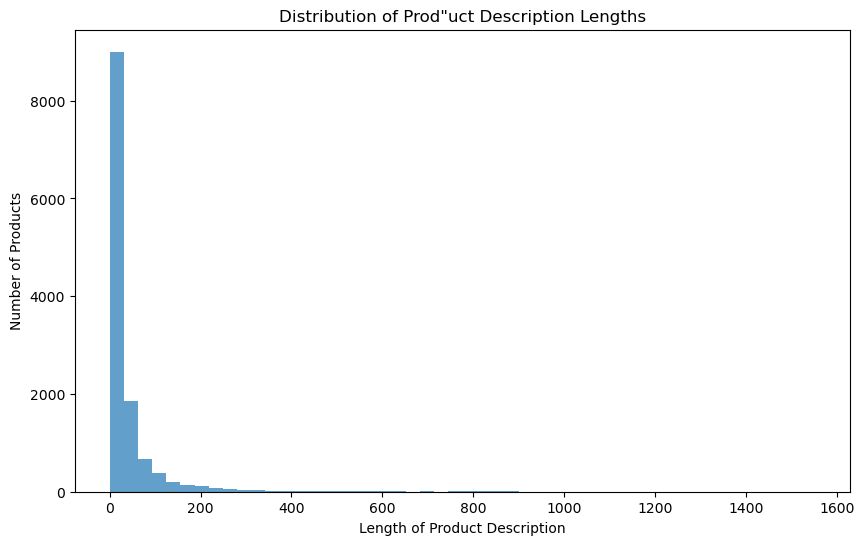

count    12778.000000
mean        43.824542
std         94.837469
min          1.000000
25%          8.000000
50%         17.000000
75%         38.000000
max       1550.000000
Name: desc_length, dtype: float64

In [15]:
# Calculate the length of each product description in terms of words
product_info['desc_length'] = product_info['제품특성'].apply(lambda x: len(x.split()))

import matplotlib.pyplot as plt

# Plot the distribution of description lengths
plt.figure(figsize=(10, 6))
plt.hist(product_info['desc_length'], bins=50, alpha=0.7)
plt.title('Distribution of Prod"uct Description Lengths')
plt.xlabel('Length of Product Description')
plt.ylabel('Number of Products')
plt.show()

# Display basic statistics of description lengths
product_info['desc_length'].describe()


In [16]:
# Calculate the Interquartile Range (IQR)
Q1 = product_info['desc_length'].quantile(0.25)
Q3 = product_info['desc_length'].quantile(0.75)
IQR = Q3 - Q1

# Define a factor to identify outliers; commonly used factor is 1.5
factor = 1.5

# Calculate the lower bound to identify too short descriptions
lower_bound = Q1 - (factor * IQR)

print(f"Interquartile Range (IQR): {IQR}")
print(f"Lower Bound for Too Short Descriptions: {lower_bound}")

# Determine the number of descriptions considered too short based on this threshold
too_short_descriptions = product_info[product_info['desc_length'] < lower_bound]
num_too_short_descriptions = too_short_descriptions.shape[0]

print(f"Number of Descriptions Considered Too Short: {num_too_short_descriptions}")


Interquartile Range (IQR): 30.0
Lower Bound for Too Short Descriptions: -37.0
Number of Descriptions Considered Too Short: 0


### 너무 짧은 데이터는 충분한 정보를 주지 않기 때문에, invalid 데이터로 간주하려 했지만, IQR 방법에 의하면 음수의 길이를 제거해야 한다. 그러므로, 삭제하지 않기로 결정

### 그래도 데이터를 직접 확인하는 것이 좋다고 판단

In [18]:
short_feature_rows = product_info[product_info["제품특성"].apply(lambda x: len(x.split()) < 2)]

short_feature_rows

,제품,제품특성,desc_length
1431,B002-00908-00002,사용횟수:다회용,1
1433,B002-01001-00001,사용횟수:다회용,1
2107,B002-01989-00002,종류:치간칫솔(I자형),1
2149,B002-02246-00002,기능기능기능특징:충치예방,1
2486,B002-02272-00001,겹수롤수길이:2겹,1
2499,B002-01497-00001,겹수롤수길이:3겹,1
2528,B002-00303-00003,겹수롤수길이:2겹,1
2748,B002-01829-00005,매수정수과정:100매,1
2899,B002-01615-00001,제품타입사이즈:날개형,1
3173,B002-00649-00001,구성헤드종류부가기능:면도기,1


### 데이터를 살펴보면, 짧은 단어를 가지고 있는 데이터도 카테고리를 예측하는데 활용할 수 있을 것으로 예상

### 2) 같은 단어를 반복하는 데이터

In [21]:
#example
product_info.loc[9015]

제품                                     B002-01905-00072
제품특성           종류구성날수헤드종류부가기능부가기능부가기능부가기능부가기능부가기능:날교체용 
desc_length                                           1
Name: 9015, dtype: object

In [35]:
def detect_consecutive_repeated_words(text):
    """
    Detects consecutive repeating words in a given text and returns a count of such occurrences.
    """
    words = text.split()
    consecutive_repeats = 0
    for i in range(len(words) - 1):
        if words[i] == words[i + 1]:
            consecutive_repeats += 1
    
    return consecutive_repeats

# Apply the refined function to the '제품특성' column and find rows with consecutive repeated words
product_info['consecutive_repeats'] = product_info['제품특성'].apply(detect_consecutive_repeated_words)

# Filter rows with at least one occurrence of consecutive repeated words

repeated_consecutive_rows = product_info[product_info['consecutive_repeats'] > 0]
repeated_consecutive_rows[['제품','제품특성', 'consecutive_repeats']]

,제품,제품특성,consecutive_repeats
7,B002-01075-00001,"제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증):정, 생...",46
23,B002-01531-00010,주요 기능성(식약처인증):체지방 감소 영양소 원료명(식약처고시):비타민B1 영양소 ...,5
99,B002-01848-00003,"제품타입섭취방법섭취대상섭취횟수1일 총 섭취량주요 기능성(식약처인증):캡슐, 주요 기...",8
100,B002-01848-00004,HCA1일 총 섭취량제품용량제품타입섭취횟수섭취방법섭취대상주요 기능성(식약처인증):1...,2
101,B002-01848-00006,제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)카테킨:정...,80
...,...,...,...
12653,B002-01438-00001,"구성:본품 형태:액상형 :1개, 구성형태:본품, 구성형태:본품, 구성형태:본품, 구...",6
12738,B002-00661-00003,"타입:플레인 평량:40gsm 매수:100매 정수과정:10단계정수 :20팩, 타입평량...",1
12744,B002-01856-00006,주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원...,7
12759,B002-01625-00002,"종류:치간칫솔(L자형), 종류:치간칫솔(L자형) 특징:교정용 특징:개별포장 재질:플...",1


### '정상 데이터'와 '비정상적으로 반복 문구 데이터'가 여전히 섞여서 걸러짐. 의미 없는 반복이 있는 데이터여도 키워드를 뽑아낼 수 있는 데이터들이기 때문에 일단 사용

### 3. 텍스트 분석
### 1) Text Cleaning

In [46]:
# Define a new text cleaning function that retains Korean characters, digits, English characters, and the colon
def clean_text_keep_colon_digits_english(text):
    # Pattern to keep Korean text, digits, English letters and colon
    pattern = re.compile(r'[^가-힣0-9a-zA-Z:\s]')
    text = pattern.sub(' ', text)  # Replace characters not matching the pattern with a space
    text = ' '.join(text.split())  # Remove any extra spaces
    return text

# Re-applying the cleaning function to the correct column '제품특성' in the dataset
product_info['cleaned_제품특성'] = product_info['제품특성'].apply(clean_text_keep_colon_digits_english)

# Displaying the first few rows of the dataset to verify the cleaning
product_info[['제품특성', 'cleaned_제품특성']].head()


,제품특성,cleaned_제품특성
0,제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상...,제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상...
1,700mg x 28정,700mg x 28정
2,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭...,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭...
3,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭...,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭...
4,HCA:900mg 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):...,HCA:900mg 영양소 원료명 식약처고시 :비타민B1 영양소 원료명 식약처고시 :...


In [37]:
pip install konlpy


     ---------------------------------------- 0.0/19.4 MB ? eta -:--:--
     --------------------------------------- 0.0/19.4 MB 660.6 kB/s eta 0:00:30
      --------------------------------------- 0.3/19.4 MB 3.2 MB/s eta 0:00:07
     - -------------------------------------- 0.7/19.4 MB 5.6 MB/s eta 0:00:04
     -- ------------------------------------- 1.2/19.4 MB 6.7 MB/s eta 0:00:03
     --- ------------------------------------ 1.5/19.4 MB 7.3 MB/s eta 0:00:03
     ---- ----------------------------------- 2.1/19.4 MB 7.7 MB/s eta 0:00:03
     ----- ---------------------------------- 2.5/19.4 MB 8.0 MB/s eta 0:00:03
     ------ --------------------------------- 3.0/19.4 MB 8.3 MB/s eta 0:00:02
     ------- -------------------------------- 3.5/19.4 MB 8.5 MB/s eta 0:00:02
     -------- ------------------------------- 3.9/19.4 MB 8.6 MB/s eta 0:00:02
     -------- ------------------------------- 4.4/19.4 MB 8.7 MB/s eta 0:00:02
     --------- ------------------------------ 4.8/19.4 MB

In [48]:
from konlpy.tag import Okt
import re

# Initialize the Okt tokenizer
okt = Okt()

# Define a function to tokenize the text
def tokenize_text(text):
    # Tokenizing the text
    tokens = okt.morphs(text)
    return tokens

# Apply the function to the 'cleaned_제품특성' column
product_info['tokens'] = product_info['cleaned_제품특성'].apply(tokenize_text)

# Display the first few rows to verify tokenization
product_info[['cleaned_제품특성', 'tokens']].head()


,cleaned_제품특성,tokens
0,제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상...,"[제품, 유형, :, 일반, 식품, 콜라겐, 펩타이드, :, 1000, mg, 종류..."
1,700mg x 28정,"[700, mg, x, 28, 정]"
2,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭...,"[제품, 타입, :, 정, 섭취, 방법, :, 물, 과, 함께, 섭취, 대상, :,..."
3,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭...,"[제품, 타입, :, 정, 섭취, 방법, :, 물, 과, 함께, 섭취, 대상, :,..."
4,HCA:900mg 영양소 원료명 식약처고시 :비타민B1 영양소 원료명 식약처고시 :...,"[HCA, :, 900, mg, 영양소, 원료, 명, 식약처, 고시, :, 비타민,..."


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=1000, min_df=5, max_df=0.9)

# Fit and transform the cleaned product descriptions
tfidf_matrix = vectorizer.fit_transform(product_info['cleaned_제품특성'])

# Get feature names to use as keywords
feature_names = vectorizer.get_feature_names_out()

# Display some of the keywords
print(feature_names[:50])  # Displaying the first 50 keywords


['000회' '10' '100' '1000mg' '1000ml' '100g' '100mg' '100ml' '100매' '100억'
 '100일분' '10g' '10kg' '10ml' '10개' '10단계정수' '10매' '10억' '10일분' '10팩' '11'
 '1100ml' '110ml' '11kg' '11mg' '11개' '11단계정수' '12' '1200ml' '120g'
 '120mg' '120ml' '120매' '120정' '125ml' '12g' '12kg' '12개' '12개월' '12롤'
 '12시간' '12팩' '1300ml' '130mg' '13kg' '14' '140ml' '14kg' '14일분' '14포']


In [53]:
from sklearn.decomposition import LatentDirichletAllocation

# Initialize LDA Model
lda = LatentDirichletAllocation(n_components=15, random_state=0)

# Fit LDA model to the TF-IDF matrix
lda.fit(tfidf_matrix)

# Function to display topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Displaying topics
display_topics(lda, feature_names, 15)


Topic 0:
재질 칫솔 일반 무첨가 칫솔종류 칫솔모타입 특징 플라스틱 칫솔헤드크기 칫솔종류칫솔모타입 제품종류 편의기능 일반형 미세모 극세모
Topic 1:
특징 매수 평량 정수과정 엠보싱 타입 겹수 천연펄프 10팩 1팩 무형광 저자극 100매 보습효과 3겹
Topic 2:
주요제품특징 피부타입 모든피부용 용기형태 세부제품특징 촉촉함 수분공급 용량 향계열 1개 펌프형 튜브형 흡수력 기타향 영양공급
Topic 3:
섭취방법 제품타입 섭취횟수 하루 제품용량 섭취량 1일 섭취대상 성인남녀 물과 함께 식약처고시 원료명 주요 기능성
Topic 4:
최소연령 종류 단백질성분 기타 유발성분 알레르기 단백질 1개 보관방법 날교체용 단백질종류 무첨가 동물성 물에 섞어서
Topic 5:
함량 제품유형 홍삼농축액 바로 음용 건강기능식품 고형분 일회용 면역력 섭취대상 섭취방법 섭취횟수 하루 제품용량 1포
Topic 6:
용량 헤어타입 모든 모발용 주요제품특징 본품 제품형태 고정력 세팅력 120ml 세부제품특징 크림형 100ml 스프레이형 300ml
Topic 7:
구성 형태 본품 액상형 1개 용량 용도 리필 성분 세탁기유형 가루형 500ml 드럼겸용 1l 일반
Topic 8:
세부제품특징 주요제품특징 헤어타입 모발용 윤기부여 영양공급 모든 촉촉함 머릿결개선 수분공급 1개 제품형태 모발영양 용량 세트구성
Topic 9:
세부제품특징 주요제품특징 타입 제품형태 일반샴푸 세정력 향계열 1개 펌프형 용량 촉촉함 풍부한 거품 수분공급 머릿결개선
Topic 10:
영양소 식약처고시 원료명 기능성 식약처인증 1일 제품타입 주요 섭취량 하루 섭취횟수 섭취방법 제품용량 비타민d 섭취대상
Topic 11:
날개형 제품타입사이즈 사이즈 1팩 제품타입 일자형 기능 팬티라이너 부가기능 사용대상 흡수량 대형 모드 샘방지막 타입
Topic 12:
기능 특징 충치예방 구취제거 일반형 프라그제거 종류 구강청결 무첨가 효과 최소연령 아기주스 잇몸질환예방 기타 치은염예방
Topic 13:
무첨가 특징 피부진정 포

In [54]:
product_info

,제품,제품특성,desc_length,is_repeated,consecutive_repeats,cleaned_제품특성,tokens
0,B002-03509-00001,제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상...,20,False,0,제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상...,"[제품, 유형, :, 일반, 식품, 콜라겐, 펩타이드, :, 1000, mg, 종류..."
1,B002-02376-00001,700mg x 28정,3,False,0,700mg x 28정,"[700, mg, x, 28, 정]"
2,B002-03735-00001,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭...,75,True,0,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭...,"[제품, 타입, :, 정, 섭취, 방법, :, 물, 과, 함께, 섭취, 대상, :,..."
3,B002-03735-00003,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭...,15,False,0,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭...,"[제품, 타입, :, 정, 섭취, 방법, :, 물, 과, 함께, 섭취, 대상, :,..."
4,B002-02769-00001,HCA:900mg 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):...,25,True,0,HCA:900mg 영양소 원료명 식약처고시 :비타민B1 영양소 원료명 식약처고시 :...,"[HCA, :, 900, mg, 영양소, 원료, 명, 식약처, 고시, :, 비타민,..."
...,...,...,...,...,...,...,...
12773,B002-01994-00001,형태:액상형 구성:리필 등급:1종 용도:식기 용도:과일 용도:야채 용도:조리기구 용...,10,False,0,형태:액상형 구성:리필 등급:1종 용도:식기 용도:과일 용도:야채 용도:조리기구 용...,"[형태, :, 액, 상형, 구성, :, 리필, 등급, :, 1, 종, 용도, :, ..."
12774,B002-02600-00002,헤어타입:모든 모발용 주요제품특징:머릿결개선 세부제품특징:촉촉함(수분공급) 세부제품...,8,False,0,헤어타입:모든 모발용 주요제품특징:머릿결개선 세부제품특징:촉촉함 수분공급 세부제품특...,"[헤어, 타입, :, 모든, 모발, 용, 주요, 제품, 특징, :, 머릿결, 개선,..."
12775,B002-02372-00095,사용대상:여성용 타입:일자형 흡수량:20ml :1팩 32개,5,False,0,사용대상:여성용 타입:일자형 흡수량:20ml :1팩 32개,"[사용, 대상, :, 여, 성용, 타입, :, 일자, 형, 흡, 수량, :, 20,..."
12776,B002-01318-00002,피부타입:모든피부용 향계열:무향 주요제품특징:촉촉함(수분공급) 주요제품특징:풍부한 ...,25,True,0,피부타입:모든피부용 향계열:무향 주요제품특징:촉촉함 수분공급 주요제품특징:풍부한 거...,"[피부, 타입, :, 모든, 피부, 용, 향, 계열, :, 무향, 주요, 제품, 특..."


In [55]:
# Transforming the TF-IDF matrix to get LDA topic distribution
topic_distribution = lda.transform(tfidf_matrix)

# Example: Print topic distribution for the first product
print(topic_distribution[0])


[0.01148008 0.01148008 0.01148008 0.83927881 0.01148009 0.0114801
 0.01148008 0.01148008 0.01148008 0.01148008 0.01148009 0.01148008
 0.01148008 0.01148008 0.01148008]


In [56]:
import pandas as pd

# Convert topic distribution to DataFrame
topic_dist_df = pd.DataFrame(topic_distribution, columns=[f'Topic_{i}' for i in range(15)])

# Concatenate with the original product_info DataFrame
product_info = pd.concat([product_info.reset_index(drop=True), topic_dist_df.reset_index(drop=True)], axis=1)


In [57]:
# Assign the top topic to each product
product_info['Top_Topic'] = topic_distribution.argmax(axis=1)


In [58]:
# Example for a few selected keywords from topics
keywords = ['칫솔', '피부', '영양', '단백질', '세탁']
for keyword in keywords:
    product_info[f'Keyword_{keyword}'] = product_info['cleaned_제품특성'].apply(lambda x: 1 if keyword in x else 0)


In [59]:
product_info

,제품,제품특성,desc_length,is_repeated,consecutive_repeats,cleaned_제품특성,tokens,Topic_0,Topic_1,Topic_2,...,Topic_11,Topic_12,Topic_13,Topic_14,Top_Topic,Keyword_칫솔,Keyword_피부,Keyword_영양,Keyword_단백질,Keyword_세탁
0,B002-03509-00001,제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상...,20,False,0,제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상...,"[제품, 유형, :, 일반, 식품, 콜라겐, 펩타이드, :, 1000, mg, 종류...",0.011480,0.011480,0.011480,...,0.011480,0.011480,0.011480,0.011480,3,0,0,0,0,0
1,B002-02376-00001,700mg x 28정,3,False,0,700mg x 28정,"[700, mg, x, 28, 정]",0.066667,0.066667,0.066667,...,0.066667,0.066667,0.066667,0.066667,0,0,0,0,0,0
2,B002-03735-00001,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭...,75,True,0,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭...,"[제품, 타입, :, 정, 섭취, 방법, :, 물, 과, 함께, 섭취, 대상, :,...",0.011798,0.011798,0.011798,...,0.011798,0.011798,0.011798,0.011798,10,0,0,1,0,0
3,B002-03735-00003,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭...,15,False,0,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭...,"[제품, 타입, :, 정, 섭취, 방법, :, 물, 과, 함께, 섭취, 대상, :,...",0.014079,0.014079,0.014079,...,0.014079,0.014079,0.014079,0.014079,3,0,0,0,0,0
4,B002-02769-00001,HCA:900mg 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):...,25,True,0,HCA:900mg 영양소 원료명 식약처고시 :비타민B1 영양소 원료명 식약처고시 :...,"[HCA, :, 900, mg, 영양소, 원료, 명, 식약처, 고시, :, 비타민,...",0.011757,0.011757,0.011757,...,0.011757,0.011757,0.011757,0.011757,10,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12773,B002-01994-00001,형태:액상형 구성:리필 등급:1종 용도:식기 용도:과일 용도:야채 용도:조리기구 용...,10,False,0,형태:액상형 구성:리필 등급:1종 용도:식기 용도:과일 용도:야채 용도:조리기구 용...,"[형태, :, 액, 상형, 구성, :, 리필, 등급, :, 1, 종, 용도, :, ...",0.015915,0.015915,0.015915,...,0.015915,0.015915,0.015915,0.015915,7,0,0,0,0,0
12774,B002-02600-00002,헤어타입:모든 모발용 주요제품특징:머릿결개선 세부제품특징:촉촉함(수분공급) 세부제품...,8,False,0,헤어타입:모든 모발용 주요제품특징:머릿결개선 세부제품특징:촉촉함 수분공급 세부제품특...,"[헤어, 타입, :, 모든, 모발, 용, 주요, 제품, 특징, :, 머릿결, 개선,...",0.016603,0.016603,0.016603,...,0.016603,0.016603,0.016603,0.016603,8,0,0,0,0,0
12775,B002-02372-00095,사용대상:여성용 타입:일자형 흡수량:20ml :1팩 32개,5,False,0,사용대상:여성용 타입:일자형 흡수량:20ml :1팩 32개,"[사용, 대상, :, 여, 성용, 타입, :, 일자, 형, 흡, 수량, :, 20,...",0.018649,0.018649,0.018650,...,0.619072,0.018649,0.018649,0.018649,11,0,0,0,0,0
12776,B002-01318-00002,피부타입:모든피부용 향계열:무향 주요제품특징:촉촉함(수분공급) 주요제품특징:풍부한 ...,25,True,0,피부타입:모든피부용 향계열:무향 주요제품특징:촉촉함 수분공급 주요제품특징:풍부한 거...,"[피부, 타입, :, 모든, 피부, 용, 향, 계열, :, 무향, 주요, 제품, 특...",0.014154,0.014154,0.801849,...,0.014154,0.014154,0.014154,0.014154,2,0,1,0,0,0


In [65]:
# Merge LDA topic features with train_data
train_data_enhanced = train_data.merge(lda_topic_features, left_on="product_id", right_index=True, how="left")

# If you have keyword features, merge them as well
# train_data_enhanced = train_data_enhanced.merge(keyword_features, left_on="product_id", right_index=True, how="left")


NameError: name 'lda_topic_features' is not defined